In [98]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [99]:
os.getcwd()

'C:\\Users\\qingy\\Desktop\\STA 2453\\Data Analysis'

In [100]:
realtor = pd.read_csv(os.path.join(os.getcwd(), 'realtor.csv'))
realtor.shape

(1761, 68)

In [101]:
realtor.head()

,Address1,Address2,propertyID,listingID,propertyType,price,leasePrice,buildingType,neighbourhood,bathrooms,...,Cooling,Heating Type,Exterior Finish,Pool Type,Community Features,Amenities Nearby,Maintenance Fees,Maintenance Management Company,Total Parking Spaces,rooms_info
0,#1407 -5444 YONGE ST,"Toronto, Ontario M2N6J4",23762142,C5411047,SingleFamily,1499999.0,NaN,Apartment,NaN,2,...,Central air conditioning,Forced air (Natural gas),Concrete,"Indoor pool, Outdoor pool",NaN,NaN,"$1,528 (CAD) Monthly",Del Property Management,4.0,{'Main level': {'Living room': '7.3 m x 3.95 m...
1,#606 -300 BALLIOL ST,"Toronto, Ontario M4S3G6",23790906,C5420731,SingleFamily,548800.0,NaN,Apartment,NaN,1,...,Central air conditioning,Heat Pump (Electric),Brick,NaN,School Bus,"Park, Public Transit",$375 (CAD) Monthly,Goldview Property Management Ltd. 416-630-1234,NaN,{'Main level': {'Living room': '5.18 m x 3.05 ...
2,#1207 -5 PARKWAY FOREST DR,"Toronto, Ontario M2J1L2",23834601,C5435290,SingleFamily,549000.0,NaN,Apartment,NaN,1,...,Window air conditioner,Baseboard heaters (Electric),Brick,NaN,NaN,NaN,$674.85 (CAD) Monthly,Tech Lasi Management Service Tel 416-491-4441,1.0,{'Main level': {'Living room': '6.02 m x 3.17 ...
3,#404 -55 WELLESLEY ST E,"Toronto, Ontario M4Y2T6",23788958,C5419896,SingleFamily,939000.0,NaN,Apartment,NaN,2,...,Central air conditioning,Heat Pump (Electric),Brick,NaN,NaN,NaN,"$1,252.96 (CAD) Monthly",Community First Developments. Comfield Managem...,2.0,"{'Main level': {'Foyer': '2.5 m x 1.7 m', 'Liv..."
4,#1707 -375 KING ST W,"Toronto, Ontario M5V1K1",23801653,C5424009,SingleFamily,849000.0,NaN,Apartment,NaN,2,...,Central air conditioning,Forced air (Natural gas),Concrete,NaN,NaN,NaN,$594.63 (CAD) Monthly,Crossbridge Condominium Services - 416-979-0009,NaN,"{'Other': {'Living room': '7.2 m x 3.7 m', 'Di..."


In [102]:
# Display columns
print(realtor.columns.tolist())

['Address1', 'Address2', 'propertyID', 'listingID', 'propertyType', 'price', 'leasePrice', 'buildingType', 'neighbourhood', 'bathrooms', 'bedrooms', 'communityFeatures', 'nearbyAmenities', 'storeys', 'walkscore', 'transitscore', 'machineryIncluded', 'rentalEquipment', 'parkingType', 'majorBusinessType', 'minorBusinessType', 'totalUnits', 'landSize', 'zoningType', 'interiorFloorSpace', 'exteriorBuildingSize', 'franchise', 'buildingAmenities', 'buildingStyle', 'basementDevelopment', 'notificationUpdate', 'anchor', 'retailStorefront', 'clearCeilingHeight', 'hasphoto', 'photos', 'multimediaFeatures', 'listingVideoType', 'city', 'province', 'soldData', 'hasAlternateFeatureSheet', 'hasOpenHouse', 'hasVirtualOpenHouse', 'hasCMHCFTHBBanner', 'hasTDpreApprovalIcon', 'hasActiveVirtualOpenHouse', 'Property Type', 'Building Type', 'Community Name', 'Title', 'Annual Property Taxes', 'Parking Type', 'Time on REALTOR.ca', 'Above Grade', 'Total', 'Features', 'Building Amenities', 'Cooling', 'Heating T

In [103]:
col_type = realtor.dtypes
col_type

Address1                           object
Address2                           object
propertyID                          int64
listingID                          object
propertyType                       object
                                   ...   
Amenities Nearby                   object
Maintenance Fees                   object
Maintenance Management Company     object
Total Parking Spaces              float64
rooms_info                         object
Length: 68, dtype: object

In [104]:
realtor.describe().astype(float)

,propertyID,price,leasePrice,bathrooms,bedrooms,storeys,walkscore,transitscore,machineryIncluded,majorBusinessType,...,totalUnits,zoningType,franchise,anchor,retailStorefront,clearCeilingHeight,photos,Above Grade,Total,Total Parking Spaces
count,1.761000e+03,1.761000e+03,0.0,1761.000000,1753.000000,175.000000,0.0,0.0,0.0,0.0,...,16.0,0.0,0.0,0.0,0.0,0.0,1761.000000,1696.000000,1761.000000,1356.000000
mean,2.380492e+07,8.891246e+05,NaN,1.666099,2.063890,2.120000,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,24.356616,1.720519,1.666099,1.305310
std,2.704377e+04,7.261156e+05,NaN,0.720506,0.842928,0.662978,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,10.514439,0.703772,0.720506,4.067294
min,2.374625e+07,1.000000e+00,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000
25%,2.378453e+07,5.888000e+05,NaN,1.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,17.000000,1.000000,1.000000,1.000000
50%,2.380984e+07,6.999000e+05,NaN,2.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,25.000000,2.000000,2.000000,1.000000
75%,2.382917e+07,9.200000e+05,NaN,2.000000,3.000000,3.000000,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,33.000000,2.000000,2.000000,1.000000
max,2.384166e+07,1.029900e+07,NaN,6.000000,6.000000,3.000000,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,45.000000,5.000000,6.000000,107.000000


In [105]:
var_cat = col_type[col_type=='object'].index.tolist()
print(var_cat)

['Address1', 'Address2', 'listingID', 'propertyType', 'buildingType', 'neighbourhood', 'communityFeatures', 'nearbyAmenities', 'rentalEquipment', 'parkingType', 'landSize', 'interiorFloorSpace', 'exteriorBuildingSize', 'buildingAmenities', 'buildingStyle', 'basementDevelopment', 'notificationUpdate', 'hasphoto', 'multimediaFeatures', 'listingVideoType', 'city', 'province', 'soldData', 'hasAlternateFeatureSheet', 'hasOpenHouse', 'hasVirtualOpenHouse', 'hasCMHCFTHBBanner', 'hasTDpreApprovalIcon', 'hasActiveVirtualOpenHouse', 'Property Type', 'Building Type', 'Community Name', 'Title', 'Annual Property Taxes', 'Parking Type', 'Time on REALTOR.ca', 'Features', 'Building Amenities', 'Cooling', 'Heating Type', 'Exterior Finish', 'Pool Type', 'Community Features', 'Amenities Nearby', 'Maintenance Fees', 'Maintenance Management Company', 'rooms_info']


In [106]:
var_num = col_type[col_type!='object'].index.tolist()
print(var_num)

['propertyID', 'price', 'leasePrice', 'bathrooms', 'bedrooms', 'storeys', 'walkscore', 'transitscore', 'machineryIncluded', 'majorBusinessType', 'minorBusinessType', 'totalUnits', 'zoningType', 'franchise', 'anchor', 'retailStorefront', 'clearCeilingHeight', 'photos', 'Above Grade', 'Total', 'Total Parking Spaces']


In [107]:
for i, var in enumerate(var_cat):
    print(str(i) + " - " + str(var) + ":")
    print(realtor[var].value_counts(dropna=False))
    print('-------------------------------------------------------')
    print()

0 - Address1:
#1407 -5444 YONGE ST          1
#619 -801 KING ST W           1
11 WILLIAM POOLE WAY          1
#1414 -1 ROWNTREE RD          1
#402 -645 MILLWOOD RD         1
                             ..
#2903 -183 WELLINGTON ST W    1
#758 -313 RICHMOND ST E       1
#611 -75 EMMETT  AVE          1
#512 -88 GRANDVIEW WAY        1
#604 -25 GRENVILLE ST         1
Name: Address1, Length: 1761, dtype: int64
-------------------------------------------------------

1 - Address2:
Toronto, Ontario M2J1M5    19
Toronto, Ontario           19
Toronto, Ontario M5B0C3    10
Toronto, Ontario M5J2Z2     8
Toronto, Ontario M5V0S2     8
                           ..
Toronto, Ontario M1J3N4     1
Toronto, Ontario M5T2E5     1
Toronto, Ontario M5T0E1     1
Toronto, Ontario M6S2A2     1
Toronto, Ontario M3J1M3     1
Name: Address2, Length: 1023, dtype: int64
-------------------------------------------------------

2 - listingID:
C5411047    1
C5436159    1
C5429066    1
W5419741    1
C5437709    1
     

#### Check Missing Values

In [108]:
realtor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Address1                        1761 non-null   object 
 1   Address2                        1761 non-null   object 
 2   propertyID                      1761 non-null   int64  
 3   listingID                       1761 non-null   object 
 4   propertyType                    1761 non-null   object 
 5   price                           1761 non-null   float64
 6   leasePrice                      0 non-null      float64
 7   buildingType                    1754 non-null   object 
 8   neighbourhood                   1 non-null      object 
 9   bathrooms                       1761 non-null   int64  
 10  bedrooms                        1753 non-null   float64
 11  communityFeatures               391 non-null    object 
 12  nearbyAmenities                 11

In [109]:
for var in var_cat:
    realtor.loc[realtor[var]=='', var] = np.nan

Missing summary

In [110]:
# missing summary
MissingSummary = pd.concat([realtor.dtypes, realtor.isnull().any(axis=0), realtor.isnull().sum(axis=0)], 
                           axis=1)
# The axis to concatenate along
MissingSummary.columns = ['FeatureType','IsMissing', 'MissingCnt']
MissingSummary

,FeatureType,IsMissing,MissingCnt
Address1,object,False,0
Address2,object,False,0
propertyID,int64,False,0
listingID,object,False,0
propertyType,object,False,0
...,...,...,...
Amenities Nearby,object,True,581
Maintenance Fees,object,True,33
Maintenance Management Company,object,True,47
Total Parking Spaces,float64,True,405


In [111]:
DropColumn = MissingSummary[(MissingSummary.MissingCnt/realtor.shape[0]>0.2)].index.tolist()
DropColumn

['leasePrice',
 'neighbourhood',
 'communityFeatures',
 'nearbyAmenities',
 'storeys',
 'walkscore',
 'transitscore',
 'machineryIncluded',
 'rentalEquipment',
 'majorBusinessType',
 'minorBusinessType',
 'totalUnits',
 'landSize',
 'zoningType',
 'interiorFloorSpace',
 'exteriorBuildingSize',
 'franchise',
 'buildingStyle',
 'basementDevelopment',
 'anchor',
 'retailStorefront',
 'clearCeilingHeight',
 'listingVideoType',
 'Features',
 'Pool Type',
 'Community Features',
 'Amenities Nearby',
 'Total Parking Spaces']

In [112]:
realtor_copy = realtor.copy()

In [113]:
realtor = realtor.drop(DropColumn, axis=1)
realtor.shape

(1761, 40)

#### Drop duplicate columns & Insignificant Columns

In [114]:
dup_col = ['propertyType', 'buildingType', 'parkingType', 'buildingAmenities', 'Above Grade', 'Total']
# also drop province since all condo are in Ontario
useless_col = ['Address1', 'Address2', 'province', 'propertyID', 'listingID', 'notificationUpdate', 'hasphoto', 'photos','Time on REALTOR.ca', 'multimediaFeatures', 'soldData', 'hasAlternateFeatureSheet', 'hasOpenHouse', 'hasVirtualOpenHouse', 'hasCMHCFTHBBanner', 'hasTDpreApprovalIcon', 'hasActiveVirtualOpenHouse']

In [115]:
realtor = realtor.drop(dup_col, axis=1)
realtor = realtor.drop(useless_col, axis=1)
realtor.shape

(1761, 17)

In [116]:
realtor.columns

Index(['price', 'bathrooms', 'bedrooms', 'city', 'Property Type',
       'Building Type', 'Community Name', 'Title', 'Annual Property Taxes',
       'Parking Type', 'Building Amenities', 'Cooling', 'Heating Type',
       'Exterior Finish', 'Maintenance Fees', 'Maintenance Management Company',
       'rooms_info'],
      dtype='object')

#### Drop rows if features are missing

In [117]:
realtor = realtor.dropna()
realtor = realtor.reset_index(drop=True)
realtor.shape

(1245, 17)

### Overview the cleaned dataset

In [118]:
col_type = realtor.dtypes
col_type

price                             float64
bathrooms                           int64
bedrooms                          float64
city                               object
Property Type                      object
Building Type                      object
Community Name                     object
Title                              object
Annual Property Taxes              object
Parking Type                       object
Building Amenities                 object
Cooling                            object
Heating Type                       object
Exterior Finish                    object
Maintenance Fees                   object
Maintenance Management Company     object
rooms_info                         object
dtype: object

In [119]:
var_cat = col_type[col_type=='object'].index.tolist()
print(var_cat)

['city', 'Property Type', 'Building Type', 'Community Name', 'Title', 'Annual Property Taxes', 'Parking Type', 'Building Amenities', 'Cooling', 'Heating Type', 'Exterior Finish', 'Maintenance Fees', 'Maintenance Management Company', 'rooms_info']


In [120]:
var_num = col_type[col_type!='object'].index.tolist()
print(var_num)

['price', 'bathrooms', 'bedrooms']


In [121]:
for i, var in enumerate(var_cat):
    print(str(i) + " - " + str(var) + ":")
    print(realtor[var].value_counts(dropna=False))
    print('-------------------------------------------------------')
    print()

0 - city:
Toronto    1245
Name: city, dtype: int64
-------------------------------------------------------

1 - Property Type:
Single Family    1245
Name: Property Type, dtype: int64
-------------------------------------------------------

2 - Building Type:
Apartment          1193
Row / Townhouse      52
Name: Building Type, dtype: int64
-------------------------------------------------------

3 - Community Name:
Waterfront Communities C1    176
Church-Yonge Corridor         93
Niagara                       68
Bay Street Corridor           66
Mimico                        66
                            ... 
Humbermede                     1
Humberlea-Pelmo Park W5        1
Weston-Pellam Park             1
Junction Area                  1
East York                      1
Name: Community Name, Length: 115, dtype: int64
-------------------------------------------------------

4 - Title:
Condominium/Strata        1225
Undivided Co-ownership      10
Shares in Co-operative      10
Name: Titl

#### Convert Annual Property Tax & Maintenance Fees to numeric

In [122]:
## helper function
def get_fee(string):
    fee = float(string.replace(',','').split()[0].split("$")[1])
    return fee

In [123]:
realtor['num_property_tax'] = realtor['Annual Property Taxes'].apply(get_fee)
realtor['num_maintenance_fee'] = realtor['Maintenance Fees'].apply(get_fee)

In [124]:
realtor.head()

,price,bathrooms,bedrooms,city,Property Type,Building Type,Community Name,Title,Annual Property Taxes,Parking Type,Building Amenities,Cooling,Heating Type,Exterior Finish,Maintenance Fees,Maintenance Management Company,rooms_info,num_property_tax,num_maintenance_fee
0,1499999.0,2,2.0,Toronto,Single Family,Apartment,Willowdale West,Condominium/Strata,"$3,623 (CAD)",Underground,"Security/Concierge, Exercise Centre",Central air conditioning,Forced air (Natural gas),Concrete,"$1,528 (CAD) Monthly",Del Property Management,{'Main level': {'Living room': '7.3 m x 3.95 m...,3623.00,1528.00
1,548800.0,1,1.0,Toronto,Single Family,Apartment,Mount Pleasant West,Condominium/Strata,"$1,912.47 (CAD)",Visitor Parking,"Storage - Locker, Party Room, Exercise Centre",Central air conditioning,Heat Pump (Electric),Brick,$375 (CAD) Monthly,Goldview Property Management Ltd. 416-630-1234,{'Main level': {'Living room': '5.18 m x 3.05 ...,1912.47,375.00
2,939000.0,2,2.0,Toronto,Single Family,Apartment,Church-Yonge Corridor,Condominium/Strata,"$3,207.82 (CAD)","Underground, Visitor Parking","Storage - Locker, Car Wash, Party Room",Central air conditioning,Heat Pump (Electric),Brick,"$1,252.96 (CAD) Monthly",Community First Developments. Comfield Managem...,"{'Main level': {'Foyer': '2.5 m x 1.7 m', 'Liv...",3207.82,1252.96
3,849000.0,2,2.0,Toronto,Single Family,Apartment,Waterfront Communities C1,Condominium/Strata,"$3,250.59 (CAD)",Underground,"Security/Concierge, Sauna, Exercise Centre, Re...",Central air conditioning,Forced air (Natural gas),Concrete,$594.63 (CAD) Monthly,Crossbridge Condominium Services - 416-979-0009,"{'Other': {'Living room': '7.2 m x 3.7 m', 'Di...",3250.59,594.63
4,749000.0,1,2.0,Toronto,Single Family,Apartment,Waterfront Communities C1,Condominium/Strata,"$2,712.90 (CAD)","Underground, Visitor Parking","Storage - Locker, Security/Concierge, Exercise...",Central air conditioning,Forced air (Natural gas),Concrete,$429.60 (CAD) Monthly,Del Property Management,"{'Flat': {'Living room': '6 m x 3 m', 'Kitchen...",2712.90,429.60


#### Categorical Variable Encoding

In [125]:
# Building Type: 2 - on hot
# Community Name: popular 5, save others as Other (Waterfront, Church-Yonge, Niagara, Bay, Mimico, Other) 
# Title: 3 - dummy encoding
# Parking Type: create new dummy columns (Underground, Visitor, Attached, Garage)
# Building Amenities: new dummy columns (Storage, Security, Party, Exercise)
# Cooling: 3 - dummy encoding
# Heating: new (Forced, Pump)
# Exterior Finish: new (Concrete, Brick)
# Maintenance Management Company: new (Del, First Service Residential, Crossbridge, Icon, Duka)


In [126]:
## clean columns again
drop = ['city', 'Property Type', 'Annual Property Taxes', 'Maintenance Fees', 'rooms_info']

In [127]:
realtor.columns

Index(['price', 'bathrooms', 'bedrooms', 'city', 'Property Type',
       'Building Type', 'Community Name', 'Title', 'Annual Property Taxes',
       'Parking Type', 'Building Amenities', 'Cooling', 'Heating Type',
       'Exterior Finish', 'Maintenance Fees', 'Maintenance Management Company',
       'rooms_info', 'num_property_tax', 'num_maintenance_fee'],
      dtype='object')

### Visualization

In [128]:
realtor.describe().astype(float)

,price,bathrooms,bedrooms,num_property_tax,num_maintenance_fee
count,1.245000e+03,1245.000000,1245.000000,1245.000000,1245.000000
mean,9.123880e+05,1.690763,2.083534,2745.418779,766.676040
std,6.852517e+05,0.693298,0.793519,2450.001242,526.656582
min,1.335000e+04,1.000000,0.000000,0.000000,0.540000
25%,5.990000e+05,1.000000,2.000000,1716.950000,487.310000
50%,7.200000e+05,2.000000,2.000000,2356.830000,641.090000
75%,9.499000e+05,2.000000,3.000000,3256.700000,864.410000
max,9.880000e+06,6.000000,6.000000,30843.940000,6884.000000


<AxesSubplot:xlabel='price'>

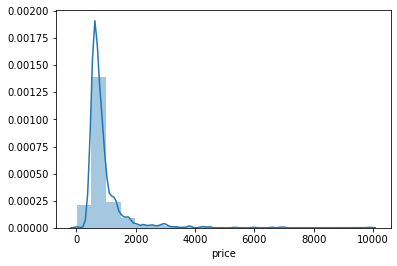

In [129]:
sns.distplot(realtor['price']/1000, hist=True, bins=20)

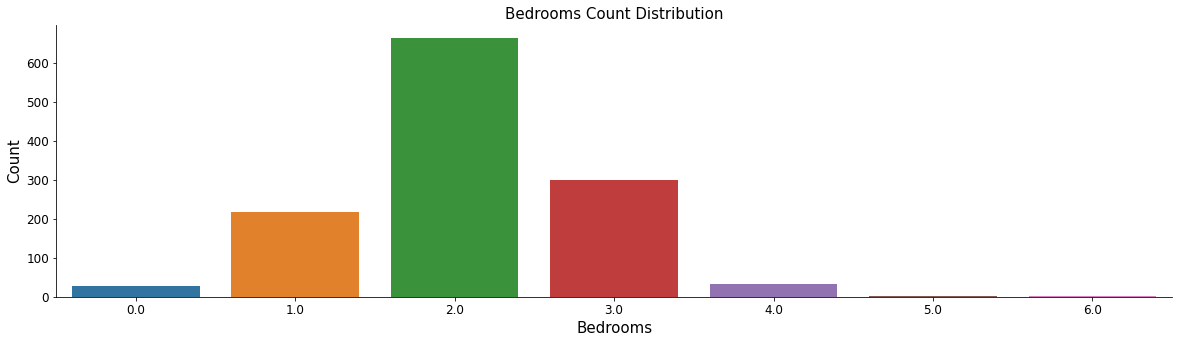

In [130]:
fig, ax1 = plt.subplots(figsize=(20,5))
sns.countplot(x = 'bedrooms', data = realtor, ax = ax1)
ax1.set_xlabel('Bedrooms', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Bedrooms Count Distribution', fontsize=15)
ax1.tick_params(labelsize=12)
sns.despine()

### Model: Lasso/Random Forest

In [132]:
col_type = realtor.dtypes
var_num = col_type[col_type!='object'].index.tolist()
var_num

['price', 'bathrooms', 'bedrooms', 'num_property_tax', 'num_maintenance_fee']

In [133]:
X_train = realtor[var_num].drop("price", axis=1) # drop labels for training set
y_train = realtor[var_num]["price"].copy()

In [ ]:
from sklearn import linear_model
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X_train,y_train)

In [ ]:
lassoReg.predict(X_test)

In [134]:
from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestRegressor(max_depth=7, random_state=824)
rf_clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, random_state=824)

In [135]:
for name, importance in zip(X_train.columns.tolist(), rf_clf.feature_importances_):
    print('%s = %.3f' %(name, importance))

bathrooms = 0.047
bedrooms = 0.005
num_property_tax = 0.625
num_maintenance_fee = 0.324


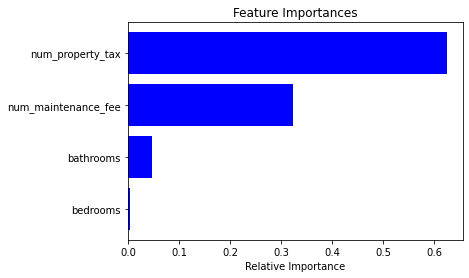

In [136]:
features = X_train.columns.tolist()
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()